In [1]:
#Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.externals import joblib

In [2]:
#Importing the training and test data
raw_data=pd.read_csv('./Raw Data/train.csv')
test_data=pd.read_csv('./Raw Data/test.csv')

In [3]:
#Storing the data in a numpy array and reshaping
raw_data_labels=raw_data.iloc[:,0]
raw_data_np=np.array(raw_data.iloc[:,1:])
raw_data_np_reshaped=raw_data_np.reshape(raw_data_np.shape[0],28,28)

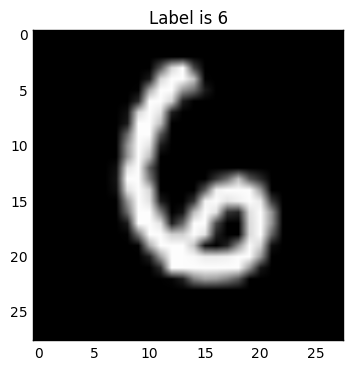

In [4]:
#Looking at a sample image
sampleImageIndex=5501
plt.title('Label is {label}'.format(label=raw_data_labels[sampleImageIndex]))
plt.imshow(raw_data_np_reshaped[sampleImageIndex,:,:],cmap='gray')
plt.show()

In [5]:
#Normalize the datasets and storing mean and sd values (to normalize test dataset)
featureMeans=raw_data_np.mean(0)
featureSDs=raw_data_np.std(0)
featureSDs[featureSDs==0]=1
raw_data_np_normalized=(raw_data_np-featureMeans)/featureSDs

In [6]:
#Reducing features using PCA
pca=PCA(n_components=450).fit(raw_data_np_normalized)
pca.explained_variance_ratio_.sum()
raw_data_np_normalized_pca=pca.transform(raw_data_np_normalized)

In [7]:
#Splitting into train and cross-validation datasets
X_train, X_CV, Y_train, Y_CV = train_test_split(raw_data_np_normalized_pca,raw_data_labels, train_size=0.8)

In [8]:
#Optimizing parameters C and gamma - this could also be done using GridSearchCV
CParameterValues=[10,100,1000]
GammaParameterValues=[0.001,0.005,0.01]
runNo=0
runNoList=[]
scoreList=[]

for CLoop in CParameterValues:
    for gammaLoop in GammaParameterValues:

        currentClassifierPolySVC=svm.SVC(C=CLoop,gamma=gammaLoop,kernel='poly',decision_function_shape='ovr').fit(X_train,Y_train)
        currentScorePolySVC=currentClassifierPolySVC.score(X_CV,Y_CV)
        
        runNo+=1
        runNoList.append(runNo)
        scoreList.append(currentScorePolySVC)
        
        print("Run No = ",runNo)
        print("C = ",CLoop)
        print("Gamma = ",gammaLoop)
        print("Prediction Accuracy = ",currentScorePolySVC)
        print("--------------------------------------------------")

        if (runNo==1):
            classifierPolySVC=currentClassifierPolySVC
            scorePolySVC=currentScorePolySVC
            C=CLoop
            gamma=gammaLoop
        elif (currentScorePolySVC>scorePolySVC):
            classifierPolySVC=currentClassifierPolySVC
            scorePolySVC=currentScorePolySVC
            C=CLoop
            gamma=gammaLoop

Run No =  1
C =  10
Gamma =  0.001
Prediction Accuracy =  0.969166666667
--------------------------------------------------
Run No =  2
C =  10
Gamma =  0.005
Prediction Accuracy =  0.974642857143
--------------------------------------------------
Run No =  3
C =  10
Gamma =  0.01
Prediction Accuracy =  0.974642857143
--------------------------------------------------
Run No =  4
C =  100
Gamma =  0.001
Prediction Accuracy =  0.974404761905
--------------------------------------------------
Run No =  5
C =  100
Gamma =  0.005
Prediction Accuracy =  0.974642857143
--------------------------------------------------
Run No =  6
C =  100
Gamma =  0.01
Prediction Accuracy =  0.974642857143
--------------------------------------------------
Run No =  7
C =  1000
Gamma =  0.001
Prediction Accuracy =  0.974642857143
--------------------------------------------------
Run No =  8
C =  1000
Gamma =  0.005
Prediction Accuracy =  0.974642857143
--------------------------------------------------
Run

In [10]:
#Saving model on disk
joblib.dump(classifierPolySVC, 'classifierPolySVC_PCA.pkl')
joblib.dump(featureMeans, 'featureMeans.pkl')
joblib.dump(featureSDs, 'featureSDs.pkl')
joblib.dump(pca, 'pca.pkl')

['pca.pkl',
 'pca.pkl_01.npy',
 'pca.pkl_02.npy',
 'pca.pkl_03.npy',
 'pca.pkl_04.npy']

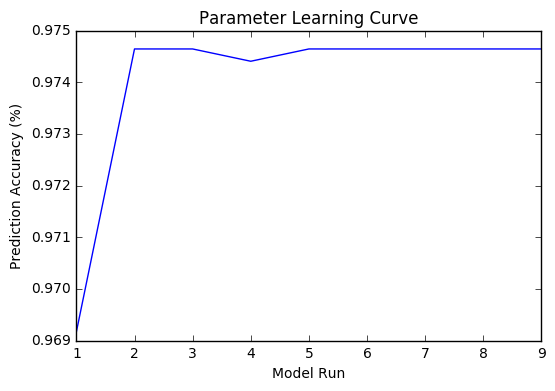

In [11]:
#Plotting model run for different parameters vs accuracy
plt.plot(runNoList,scoreList)
plt.title("Parameter Learning Curve")
plt.ylabel("Prediction Accuracy (%)")
plt.xlabel("Model Run")
plt.show()

In [12]:
#Preparing data for test data prediction

#Storing the data in a numpy array and reshaping
test_data_np=np.array(test_data)
test_data_np_reshaped=test_data_np.reshape(test_data_np.shape[0],28,28)

#Normalize the dataset using stored mean and sd values
test_data_np_normalized=(test_data_np-featureMeans)/featureSDs

#PCA
test_data_np_normalized_PCA=pca.transform(test_data_np_normalized)

#Predicting labels
test_data_labels=classifierPolySVC.predict(test_data_np_normalized_PCA)

In [13]:
#Exporting
test_result=pd.DataFrame(test_data_labels)
test_result.to_csv('Output/prediction_SVC_Poly_PCA.csv')

In [14]:
#Inverse transformation for visualizing test results
invTransform=pca.inverse_transform(test_data_np_normalized_PCA)
invTransformUnNorm=(invTransform*featureSDs)+featureMeans
invTransformUnNormReshape=invTransformUnNorm.reshape(invTransformUnNorm.shape[0],28,28)

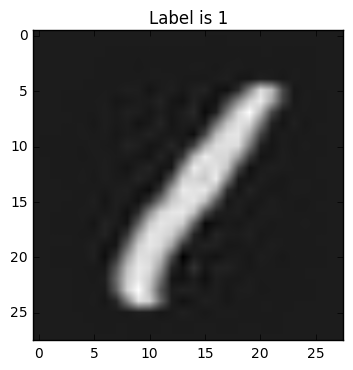

In [16]:
#Looking at a sample image
sampleImageIndex=550
plt.title('Label is {label}'.format(label=test_data_labels[sampleImageIndex]))
plt.imshow(invTransformUnNormReshape[sampleImageIndex,:,:],cmap='gray')
plt.show()